In [1]:
import pandas as pd

# Load Dataset
cancer = pd.read_csv('../data/raw/breast.csv')

In [2]:
print(cancer.head)

<bound method NDFrame.head of            ID Diagnosis  radius1  texture1  perimeter1   area1  smoothness1  \
0      842302         M    17.99     10.38      122.80  1001.0      0.11840   
1      842517         M    20.57     17.77      132.90  1326.0      0.08474   
2    84300903         M    19.69     21.25      130.00  1203.0      0.10960   
3    84348301         M    11.42     20.38       77.58   386.1      0.14250   
4    84358402         M    20.29     14.34      135.10  1297.0      0.10030   
..        ...       ...      ...       ...         ...     ...          ...   
564    926424         M    21.56     22.39      142.00  1479.0      0.11100   
565    926682         M    20.13     28.25      131.20  1261.0      0.09780   
566    926954         M    16.60     28.08      108.30   858.1      0.08455   
567    927241         M    20.60     29.33      140.10  1265.0      0.11780   
568     92751         B     7.76     24.54       47.92   181.0      0.05263   

     compactness1  co

C:\Users\Himeshi II\AppData\Local\Temp\ipykernel_6552\4049602788.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Diagnosis', data=cancer, palette='Set2')


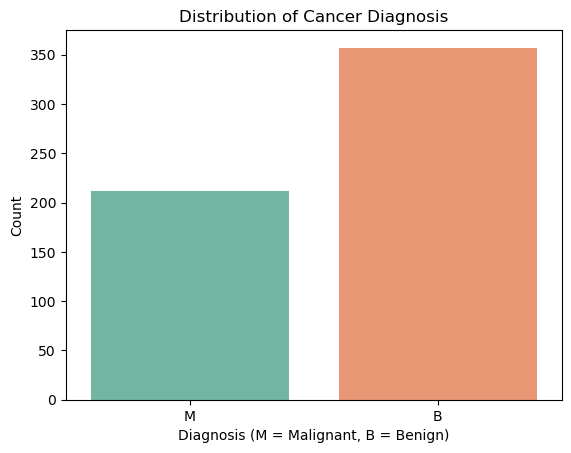

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot class distribution
sns.countplot(x='Diagnosis', data=cancer, palette='Set2')
plt.title('Distribution of Cancer Diagnosis')
plt.xlabel('Diagnosis (M = Malignant, B = Benign)')
plt.ylabel('Count')
plt.show()


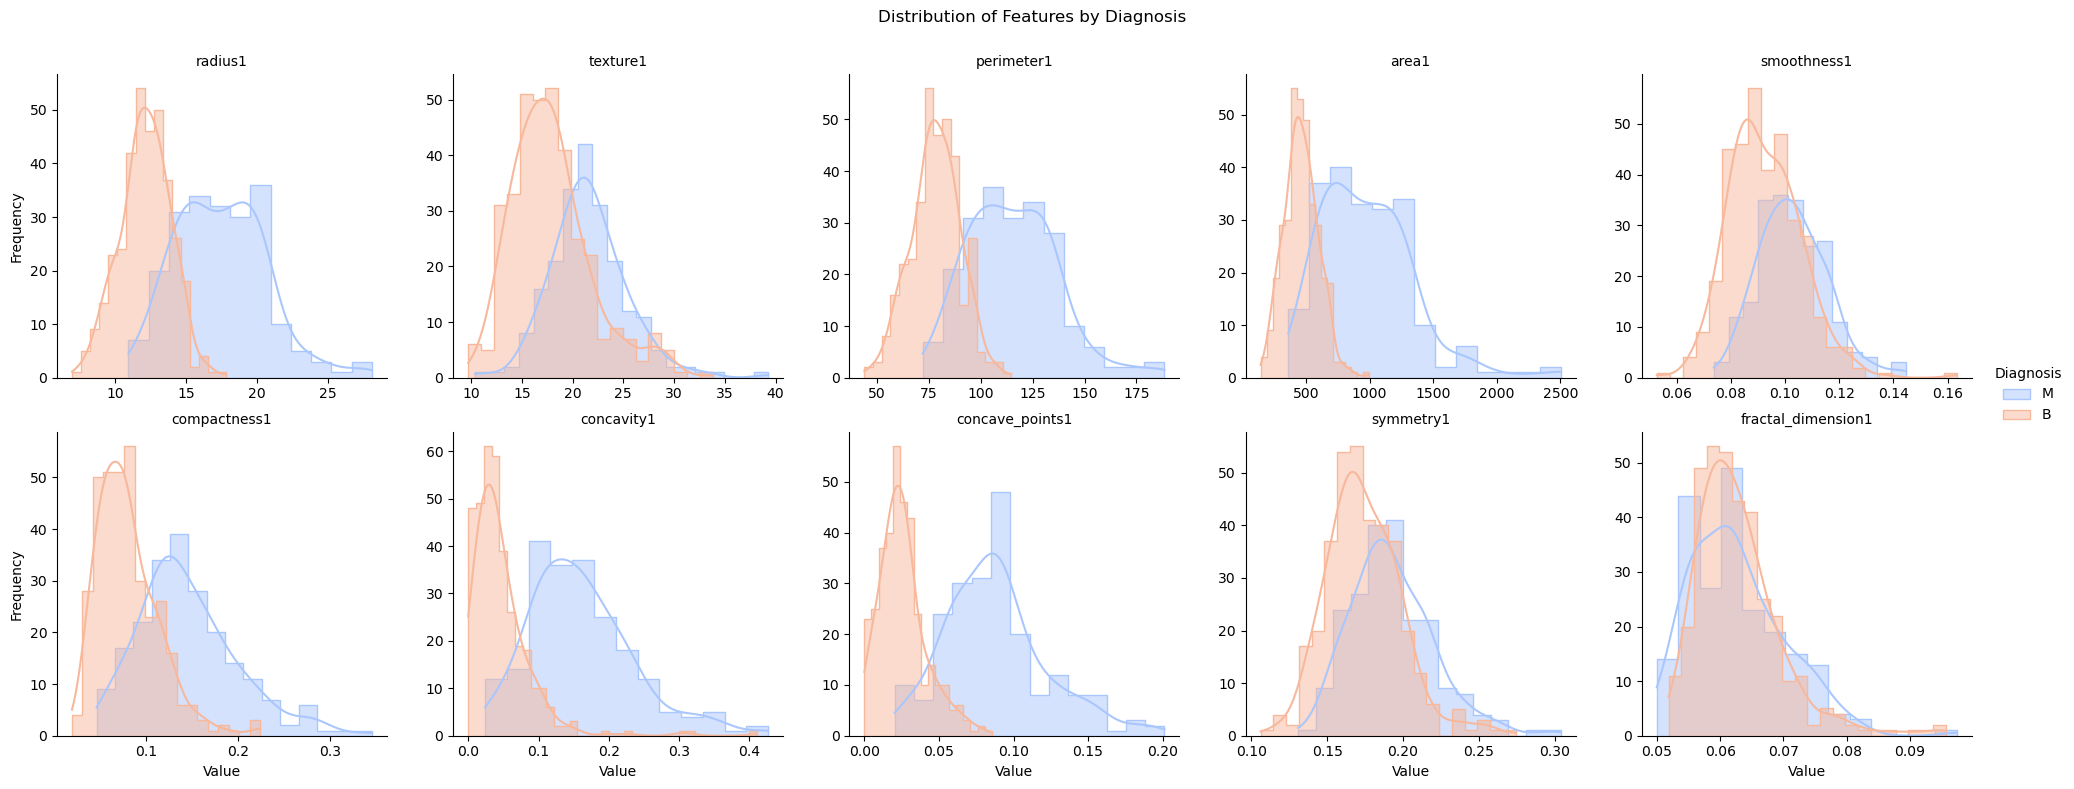

In [5]:
# Select the first 10 features + Diagnosis
features = [
    'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1',
    'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1'
]

# Melt the dataset for FacetGrid
melted_data = cancer.melt(
    id_vars='Diagnosis', 
    value_vars=features, 
    var_name='Feature', 
    value_name='Value'
)

# Plot facets
g = sns.FacetGrid(data=melted_data, col='Feature', col_wrap=5, hue='Diagnosis', sharex=False, sharey=False, palette='coolwarm', height=4)
g.map(sns.histplot, 'Value', kde=True, element='step')
g.add_legend(title='Diagnosis')
g.set_titles('{col_name}')
g.set_axis_labels('Value', 'Frequency')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Distribution of Features by Diagnosis')
plt.show()


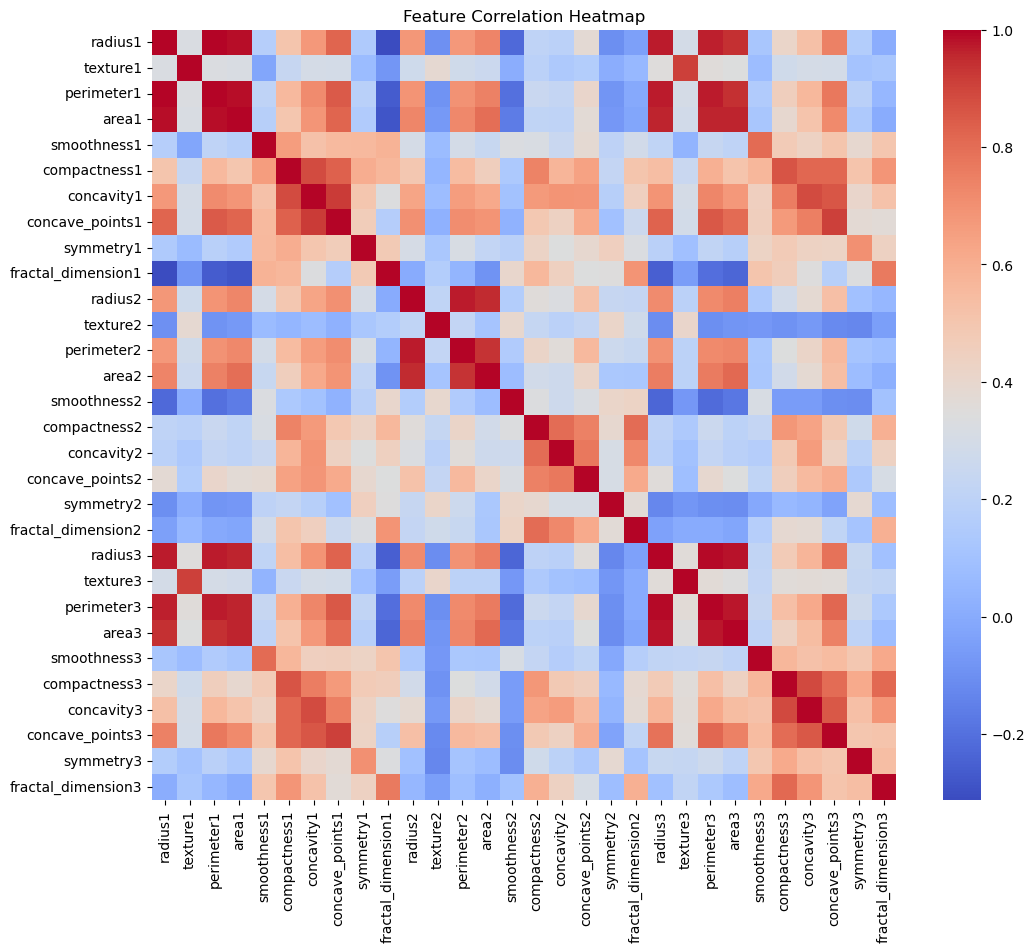

In [6]:
# Compute correlation matrix
feature_cols = cancer.columns[2:]  # Exclude ID and Diagnosis
corr_matrix = cancer[feature_cols].corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title('Feature Correlation Heatmap')
plt.show()


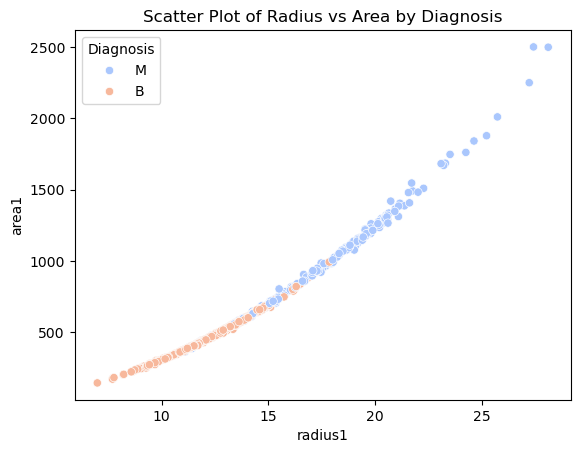

In [7]:
# Scatter plot for two highly correlated features
sns.scatterplot(data=cancer, x='radius1', y='area1', hue='Diagnosis', palette='coolwarm')
plt.title('Scatter Plot of Radius vs Area by Diagnosis')
plt.show()
